In [ ]:
%matplotlib inline
from pylab import *

In [ ]:
from sci378 import *

Version:  0.0.38


In [ ]:
from lmfit import *

See: https://lmfit.github.io/lmfit-py/builtin_models.html  for more examples

## HIV


In [ ]:
data=pd.read_csv("data/HIVseries.csv",header=None)
data

,0,1
0,0.0000,106100.0
1,0.0831,93240.0
2,0.1465,166720.0
3,0.2587,153780.0
4,0.4828,118800.0
5,0.7448,116900.0
6,0.9817,109570.0
7,1.2563,111350.0
8,1.4926,74388.0
9,1.7299,83291.0


In [ ]:
x=data[0]
y=data[1]

[<matplotlib.lines.Line2D>]

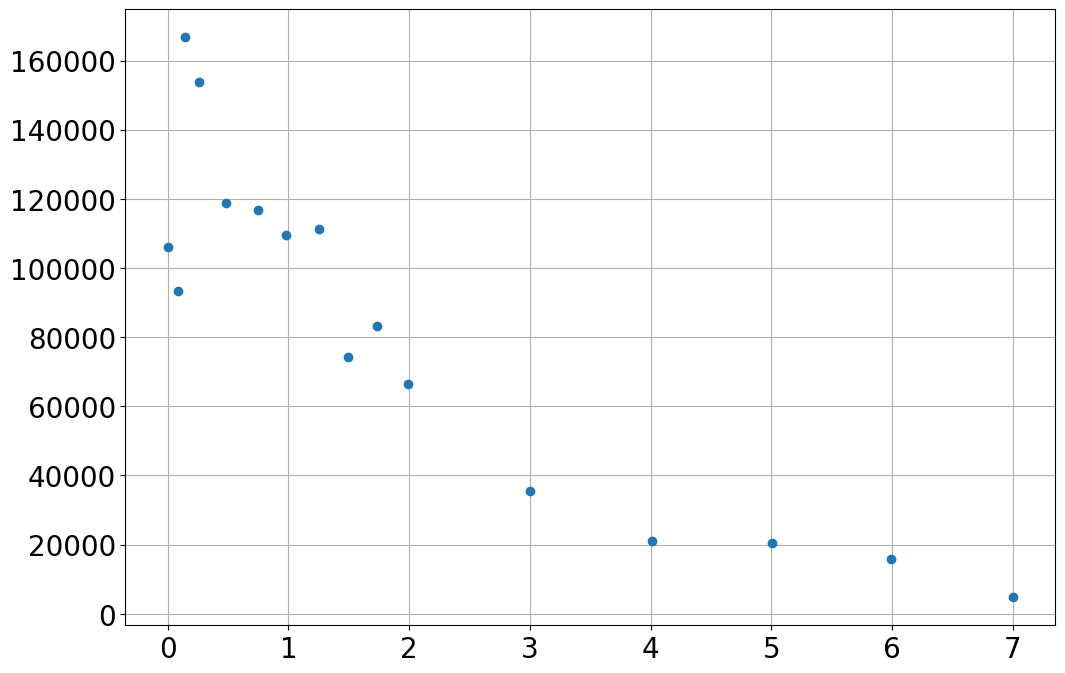

In [ ]:
plot(x,y,'o')

## Step 1 - define the function

In [ ]:
def double_exponential(t,A=1,α=.1,B=1,β=1):
    return A*exp(-α*t)+ B*exp(-β*t)

## Step 1a - parameter exploration

[<matplotlib.lines.Line2D>]

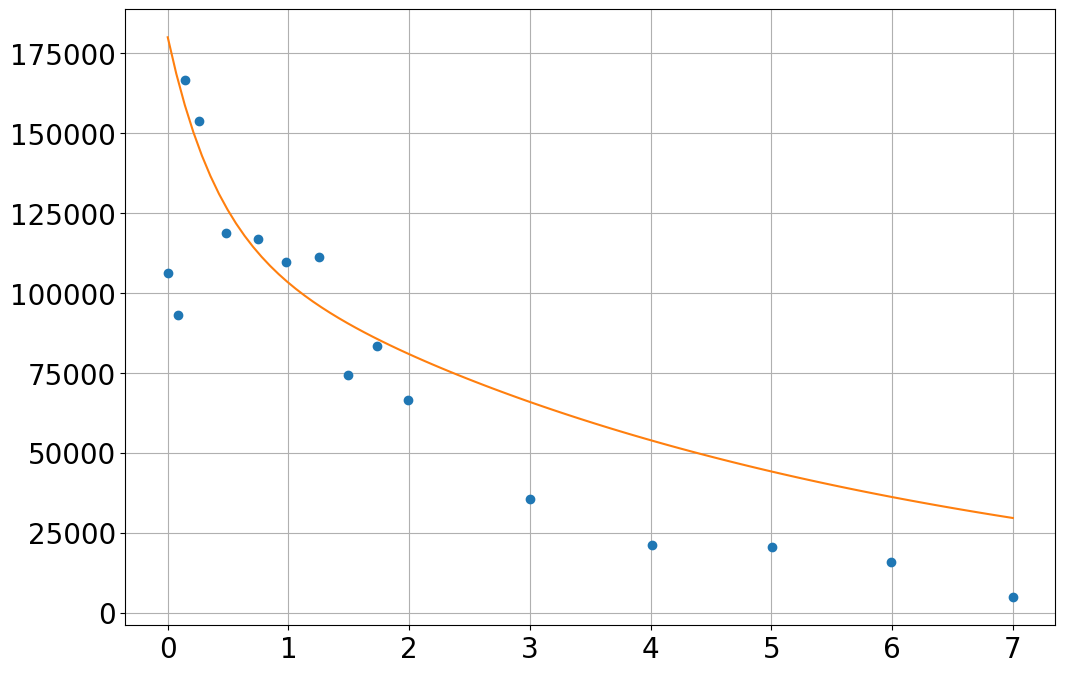

In [ ]:
tt=linspace(0,7,100)
VV=double_exponential(tt,A=120000,α=.2,B=60000,β=2.5)

plot(x,y,'o')
plot(tt,VV,'-')

## Step 2 - define the model and construct the parameter list

In [ ]:
mymodel=Model(double_exponential)   # from lmfit

In [ ]:
mymodel.param_names

['A', 'α', 'B', 'β']

In [ ]:
params=mymodel.make_params()
params

name,value,initial value,min,max,vary
A,1.00000000,None,-inf,inf,True
α,0.10000000,None,-inf,inf,True
B,1.00000000,None,-inf,inf,True
β,1.00000000,None,-inf,inf,True


## Step 3 - modify the parameter list (min, max, etc...) as needed

In [ ]:
params['A']=Parameter("A",min=1000,value=120000,vary=False)
params['B']=Parameter("B",min=1000,value=60000,vary=False)
params['α']=Parameter("α",min=0,value=1)
params['β']=Parameter("β",min=0,value=1)
params

name,value,initial value,min,max,vary
A,120000.000,120000,1000.00000,inf,False
α,1.00000000,1,0.00000000,inf,True
B,60000.0000,60000,1000.00000,inf,False
β,1.00000000,1,0.00000000,inf,True


## Step 4 - do the fit, look at the parameter values (do they make sense?), etc...

In [ ]:
result = mymodel.fit(y, params, t=x)
result

## Step 5 - plot your data and the predictions of the model

[<matplotlib.lines.Line2D>]

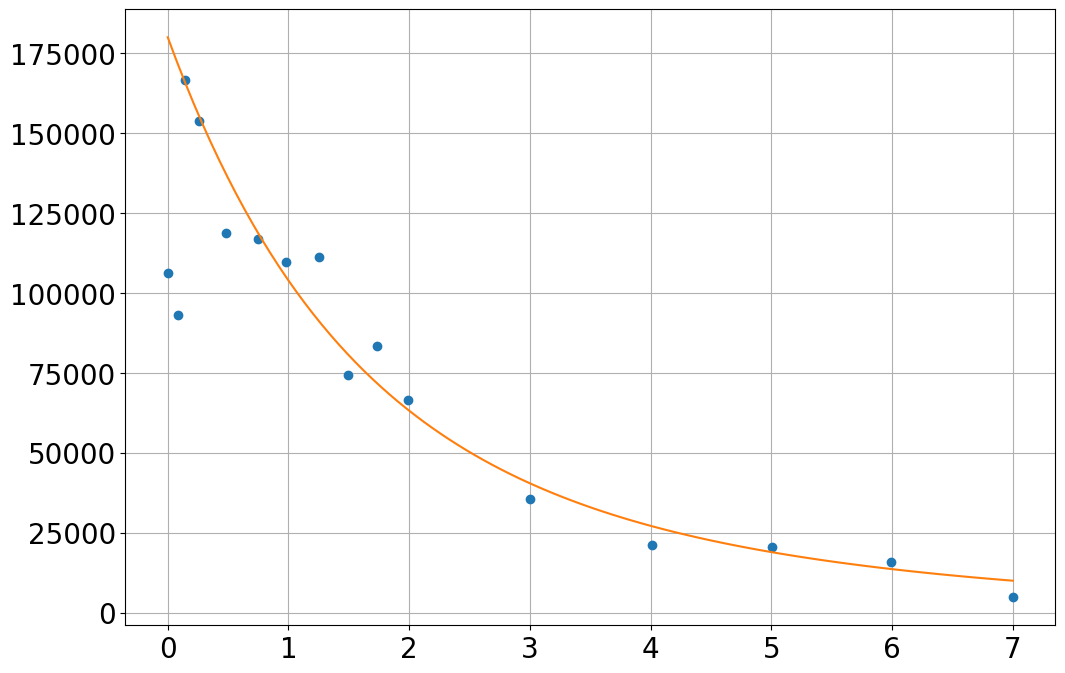

In [ ]:
plot(x,y,'o')

tt=linspace(0,7,100)
VV=result.eval(t=tt)

plot(tt,VV,'-')

